In [6]:
import pandas as pd
%matplotlib inline

data = pd.read_csv('PollutionData.csv',header='infer')
data.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
data = data.drop(labels = ['No','cbwd' , 'year'] , axis = 1)
data = data.dropna()
data.head()


,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [4]:
Y = pd.Series(data['pm2.5'].values)
X = data.drop(labels = 'pm2.5' , axis = 1)
X.head()

,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
24,1,2,0,-16,-4.0,1020.0,1.79,0,0
25,1,2,1,-15,-4.0,1020.0,2.68,0,0
26,1,2,2,-11,-5.0,1021.0,3.57,0,0
27,1,2,3,-7,-5.0,1022.0,5.36,1,0
28,1,2,4,-7,-5.0,1022.0,6.25,2,0


Root mean squared error = 78.1049
R-squared = 0.2560
Slope =  [-1.56802833  0.75050291  1.63264151  4.80497766 -6.6414188  -1.47624944
 -0.25073801 -2.70947104 -7.33484175]
Intercept =  1660.6910474042156


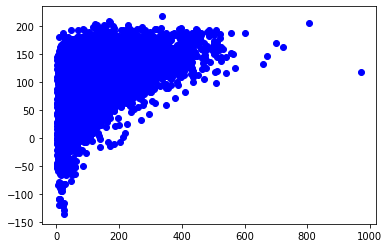

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .3 , train_size = .7 , random_state=1)


# Create linear regression object
regr = linear_model.LinearRegression()


# Fit regression model to the training set
regr.fit(X_train, y_train)



# Apply model to the test set
y_pred_test = regr.predict(X_test)


# Evaluate the results
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))
print('Slope = ', regr.coef_)
print('Intercept = ', regr.intercept_)


plt.scatter(y_test, y_pred_test, color='blue')